# 1. Remove dodgy images

In [3]:
import tensorflow as tf
import os


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 


In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
        

# 2. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 14386 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()


In [13]:
batch = data_iterator.next()
len(batch)


2

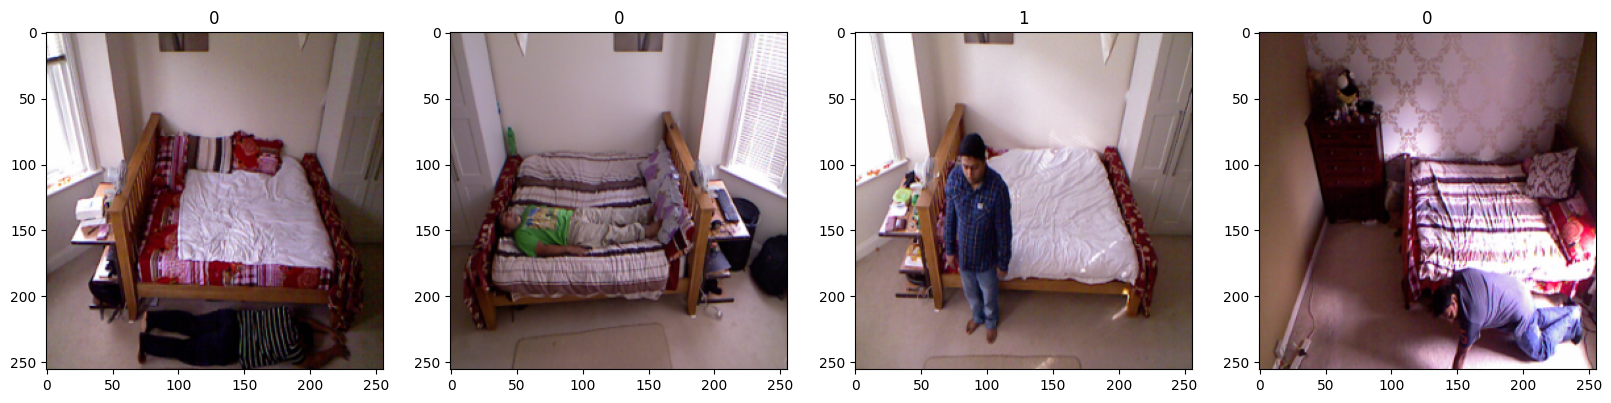

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [16]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.5063726 , 0.47401962, 0.39068627],
          [0.4990196 , 0.47401962, 0.39803922],
          [0.45588234, 0.4509804 , 0.40735295]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.5023744 , 0.4695772 , 0.37913603],
          [0.49946386, 0.4651348 , 0.42202818],
          [0.4816483 , 0.4554228 , 0.36648285]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.49162072, 0.46704963, 0.41185662],
          [0.49330577, 0.4642157 , 0.42740503],
          [0.48431373, 0.4500919 , 0.39368874]],
 
         ...,
 
         [[0.5317555 , 0.50877756, 0.47472426],
          [0.53198

# 4. Split Data

In [17]:
len(data)

450

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [19]:
train_size

315

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
#len(test)

# 5. Build Deep Learning Model

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


#from tensorflow.python.module import sequential


sequantial used for one input and one uotput
functional used for multiple input and multiple uotput and multiole connections 

In [23]:

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout 

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 6. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [98]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
 92/315 [=======>......................] - ETA: 2:54 - loss: 0.4506 - accuracy: 0.7809

KeyboardInterrupt: 

# 7. Plot Performance

In [ ]:
hist

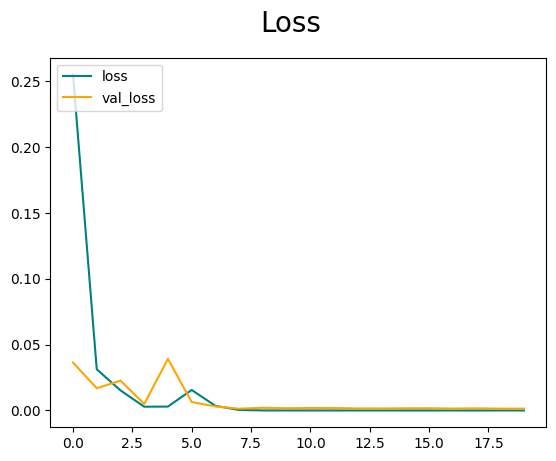

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

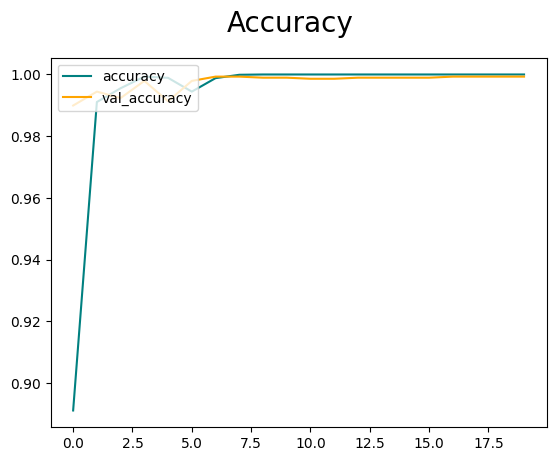

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [30]:
#from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.metrics import Precision,Recall,BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 225ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.589372, shape=(), dtype=float32) tf.Tensor(0.13391878, shape=(), dtype=float32) tf.Tensor(0.38709676, shape=(), dtype=float32)


# 9. Test

In [34]:
import cv2

In [39]:
test_dir ='test'
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        print(image_class)
        # try: 
        #     img = cv2.imread(image_path)
        #     tip = imghdr.what(image_path)
        #     if tip not in image_exts: 
        #         print('Image not in ext list {}'.format(image_path))
        #         os.remove(image_path)
        # except Exception as e: 
        #     print('Issue with image {}'.format(image_path))
        #     # os.remove(image_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'test\\rgb_0001.png'

In [ ]:
img = cv2.imread('test/rgb_0643.png')

imgList = (cv2.imread('test/rgb_0251.png'),cv2.imread('test/rgb_0540.png'),cv2.imread('test/rgb_0250.png'),cv2.imread('test/rgb_0301.png'),cv2.imread('test/rgb_0405.png'))
# for imag in imgList:
#     plt.imshow(imag)
#     plt.show()


aditional code

1/1 [==============================] - 0s 36ms/step


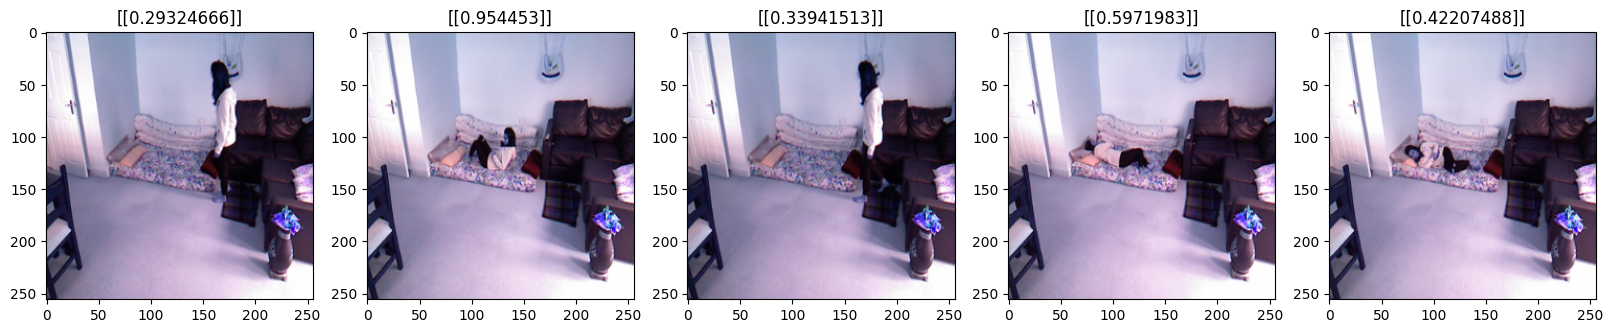

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
i=0
for  imag in imgList:          #enumerate(batch[0][:6]):
    resize = tf.image.resize(imag, (256,256))
    #ax[idx].imshow(resize.astype(int))
    ax[i].imshow(resize.numpy().astype(int))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    ax[i].title.set_text(yhat)
    #print (idx,i,ax)
    #print(ax[i])
    i=i+1

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
yhat


array([[0.42207488]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is normal')
else:
    print(f'Predicted class is fall')

Predicted class is fall


# 11. Save the Model

In [ ]:
# from tensorflow.keras.models import load_model
from keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined